## Lab 04

Due date: Thursday, **Feb 20** submitted as PDF or HTML to Canvas Lab04 link. This lab counts 9 % toward your total grade.

Objectives:
1. Understand Spatial Relationships.
2. Implement Subqueries.

For each task:
1. Provide the SQL Query 
2. Plot the output. 


In [1]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd

In [2]:
host = 'localhost'
database = 'test'
user = 'postgres'
port = '5432'
password = os.getenv('SQL_PASSWORD')

In [3]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys']

# In-class Practice
## 1. ST_Equals
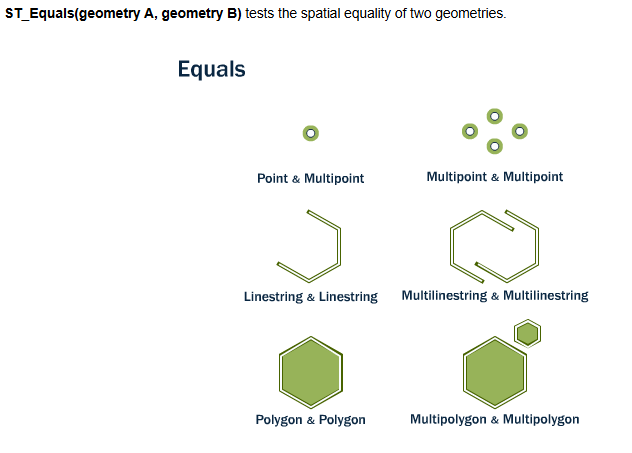

## Task 1
Use `ST_Equals()` to find the `name` of the subway station where its geometry is `0101000020266900002A40A25A52DE2141EBE9FA836A365141`

       name                            geom
0  Times Sq  POINT (585513.177 4512170.062)


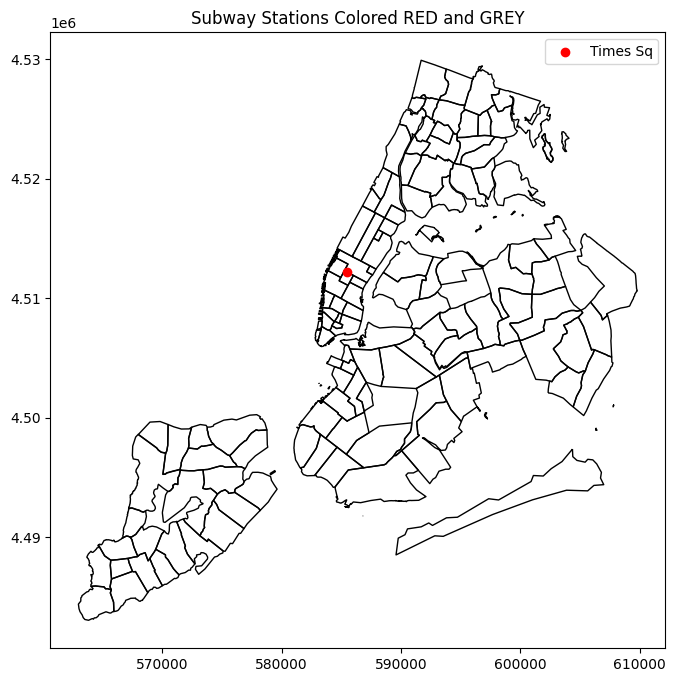

In [ ]:
query = """
SELECT name, geom
FROM ch05.subway_stations
WHERE ST_Equals(geom, '0101000020266900002A40A25A52DE2141EBE9FA836A365141');
"""

subway_stations = gpd.read_postgis(query, engine, geom_col='geom')
print(subway_stations)
query02 = """
SELECT * FROM ch05.neighborhoods
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
subway_stations.plot(ax=ax, color='red', label='Times Sq')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## 2. ST_Intersects / ST_Disjoint()
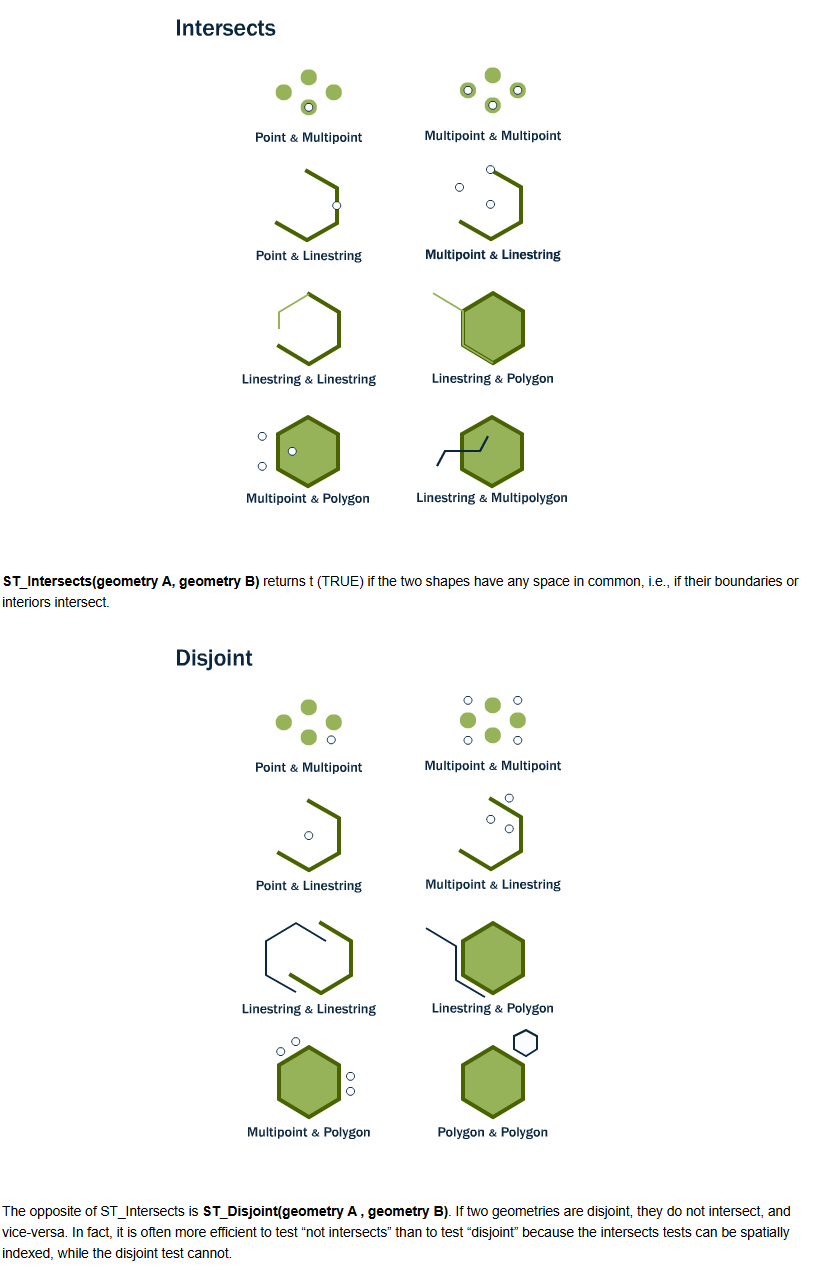
## Task 2
Please the neighborhoods that intersect with `5th Ave` by using `ST_Intersects`; highlight the street in red and plot the neighborhood

       name               name   boroname  \
0   5th Ave             Harlem  Manhattan   
1   5th Ave        East Harlem  Manhattan   
2   5th Ave      The Rockaways     Queens   
3   5th Ave       Throggs Neck  The Bronx   
4   5th Ave       Throggs Neck  The Bronx   
5   5th Ave       Throggs Neck  The Bronx   
6   5th Ave       Throggs Neck  The Bronx   
7   5th Ave        Sunset Park   Brooklyn   
8   5th Ave          Bay Ridge   Brooklyn   
9   5th Ave          Greenwood   Brooklyn   
10  5th Ave         Park Slope   Brooklyn   
11  5th Ave  Greenwich Village  Manhattan   
12  5th Ave           Gramercy  Manhattan   
13  5th Ave        Murray Hill  Manhattan   
14  5th Ave           Gramercy  Manhattan   
15  5th Ave            Midtown  Manhattan   
16  5th Ave    Upper East Side  Manhattan   
17  5th Ave      Carnegie Hill  Manhattan   
18  5th Ave          Yorkville  Manhattan   
19  5th Ave        East Harlem  Manhattan   
20  5th Ave         Fort Green   Brooklyn   
21  5th Av

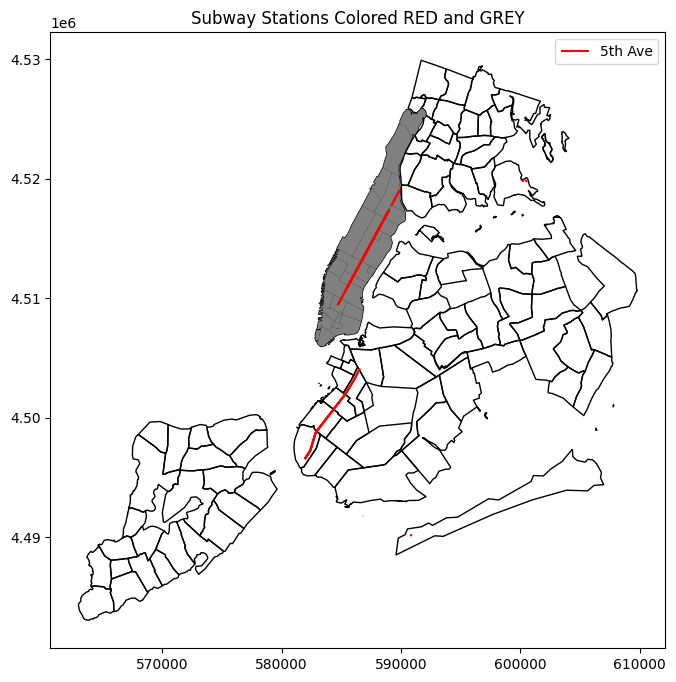

In [31]:
query = """
SELECT street.name, nbh.name, nbh.boroname, street.geom
FROM ch05.streets AS street, ch05.neighborhoods AS nbh
WHERE street.name = '5th Ave' AND ST_Intersects(street.geom, nbh.geom);
"""

subway_stations = gpd.read_postgis(query, engine, geom_col='geom')
print(subway_stations)
query02 = """
SELECT * FROM ch05.neighborhoods
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
all_neighborhood[all_neighborhood['boroname'] == 'Manhattan'].plot(ax=ax, color = 'grey')
subway_stations.plot(ax=ax, color='red', label='5th Ave')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## 3. ST_Crosses()
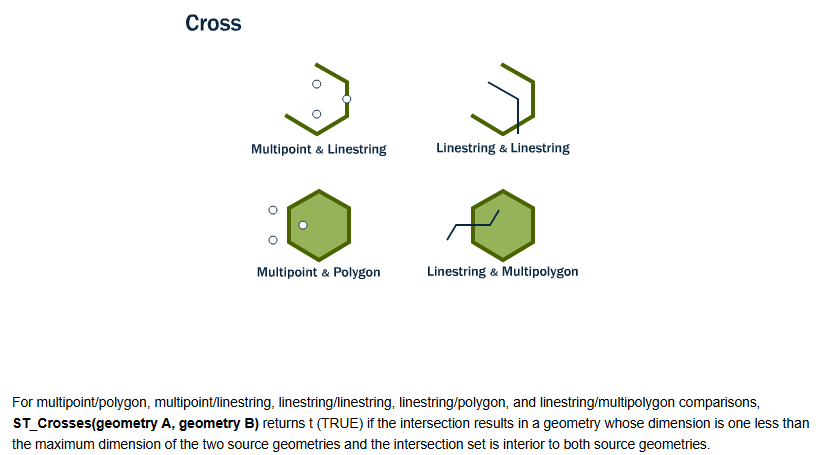
## Task 3
Please find streets cross `Howland Hook` in Staten Island; highlight the streets in red, plot the neighborhoods, and grey out `Howland Hook`

                 name          name       boroname  \
0            Ewing St  Howland Hook  Staten Island   
1       Goethals Rd N  Howland Hook  Staten Island   
2   Staten Island Pky  Howland Hook  Staten Island   
3                None  Howland Hook  Staten Island   
4                None  Howland Hook  Staten Island   
5          Meeker Ave  Howland Hook  Staten Island   
6          Forest Ave  Howland Hook  Staten Island   
7                None  Howland Hook  Staten Island   
8            Lisk Ave  Howland Hook  Staten Island   
9   Staten Island Pky  Howland Hook  Staten Island   
10       Richmond Ter  Howland Hook  Staten Island   
11          Cable Way  Howland Hook  Staten Island   
12       Arlington Pl  Howland Hook  Staten Island   
13               None  Howland Hook  Staten Island   
14         Forest Ave  Howland Hook  Staten Island   

                                                 geom  
0   MULTILINESTRING ((570359.071 4497138.065, 5703...  
1   MULTILINESTRING ((5

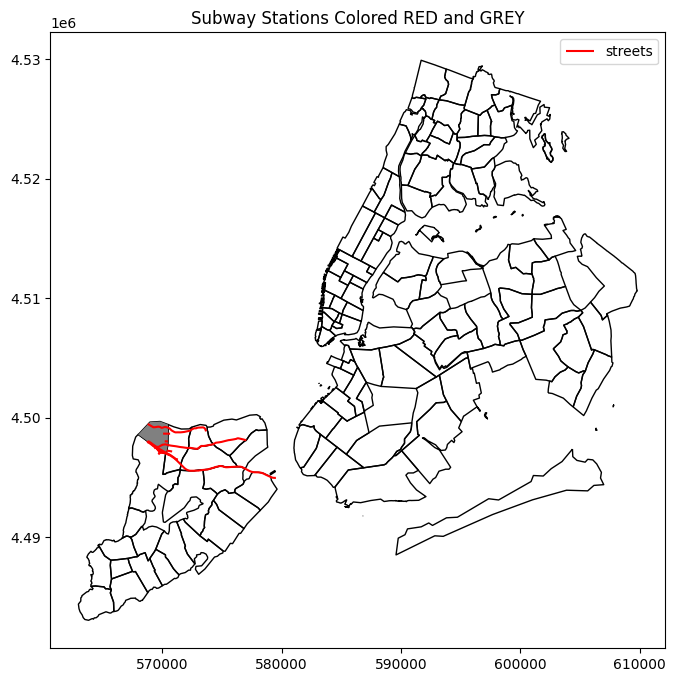

In [38]:
query = """
SELECT street.name, nbh.name, nbh.boroname, street.geom
FROM ch05.streets AS street, ch05.neighborhoods AS nbh
WHERE nbh.boroname = 'Staten Island' AND nbh.name = 'Howland Hook' AND ST_Crosses(street.geom, nbh.geom);
"""
subway_stations = gpd.read_postgis(query, engine, geom_col='geom')
print(subway_stations)

query02 = """
SELECT * FROM ch05.neighborhoods
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
all_neighborhood[all_neighborhood['name'] == 'Howland Hook'].plot(ax=ax, color = 'grey')
subway_stations.plot(ax=ax, color='red', label='streets')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## 4. ST_Overlaps()
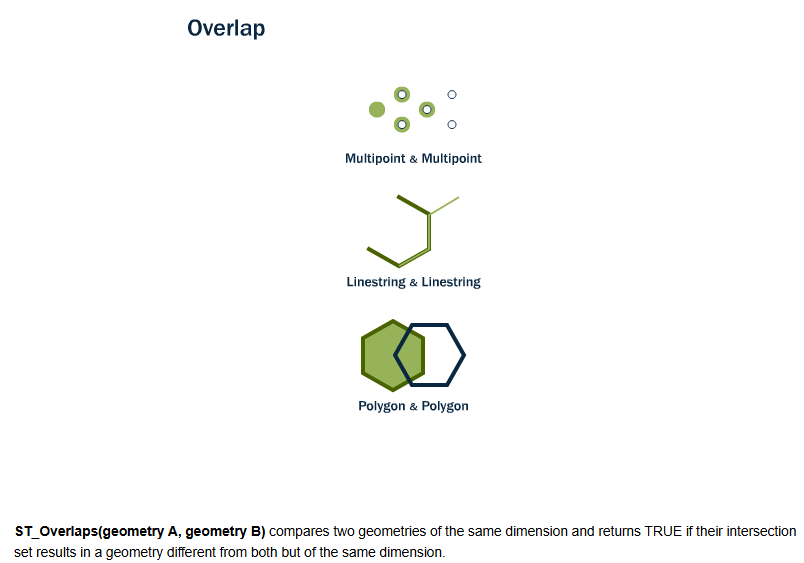

## Task 4
Check out any overlapping streets exist

C:\Users\wlicc\AppData\Local\Temp\ipykernel_41624\3569129261.py:17: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subway_stations.plot(ax=ax, color='red', label='streets')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Empty GeoDataFrame
Columns: [name, geom]
Index: []


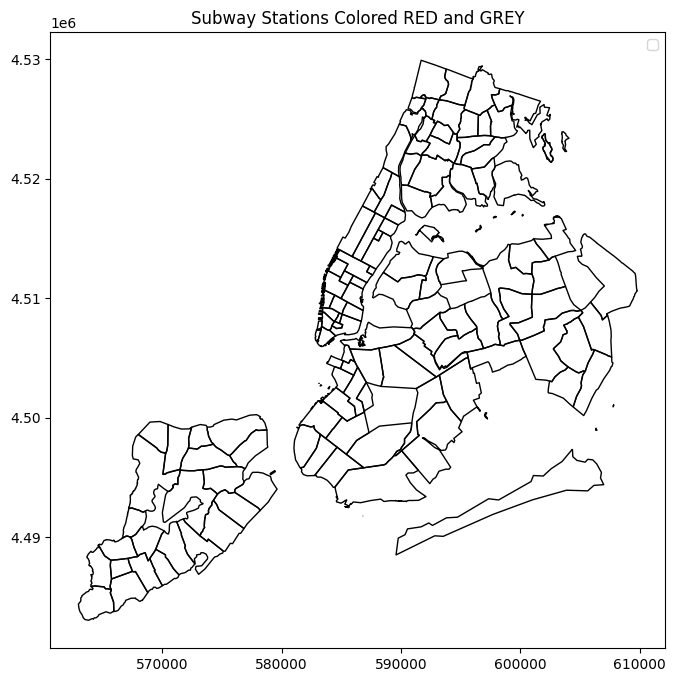

In [43]:
query = """
SELECT streets.name, streets.geom
FROM ch05.streets AS streets
WHERE ST_Overlaps(streets.geom, streets.geom);
"""
subway_stations = gpd.read_postgis(query, engine, geom_col='geom')
print(subway_stations)

query02 = """
SELECT * FROM ch05.neighborhoods
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
subway_stations.plot(ax=ax, color='red', label='streets')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## 5. ST_Touches()
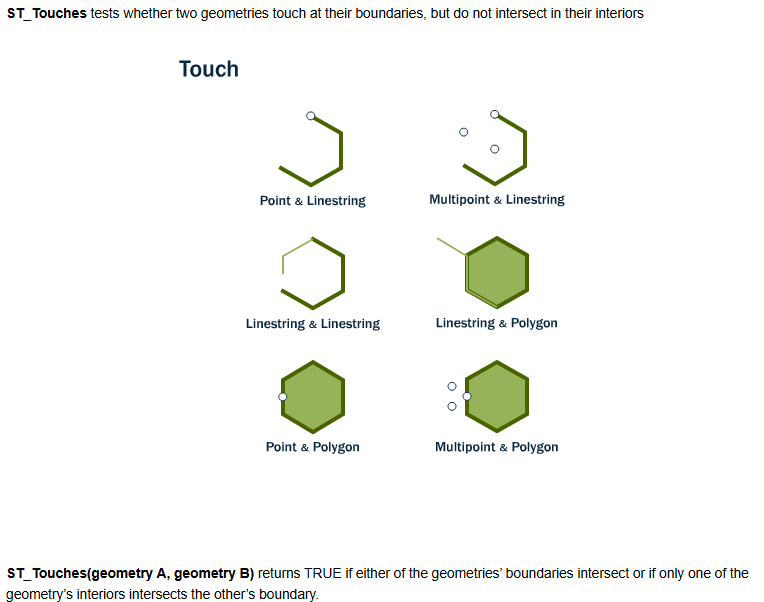

## 6. ST_Within() and ST_contains()
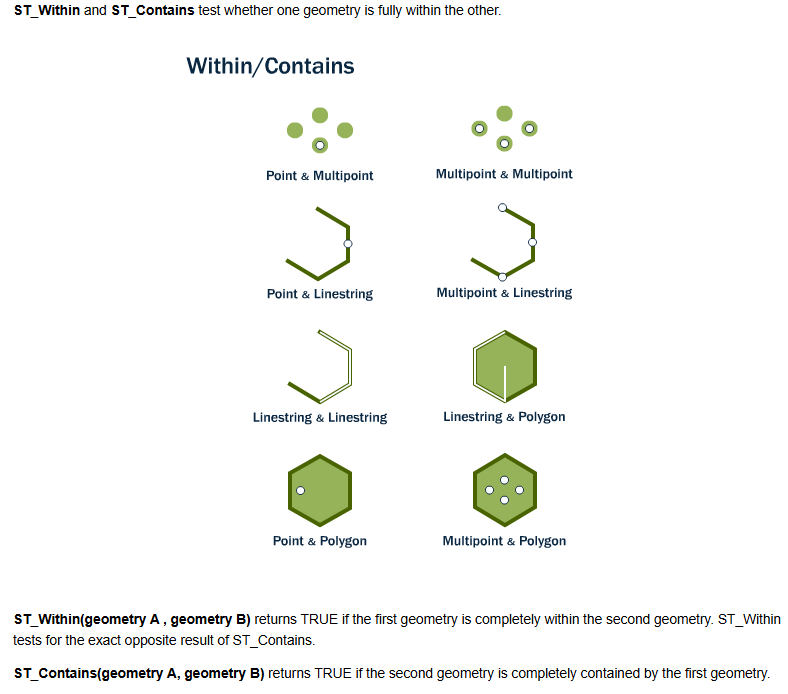

## Task 5
Please find out and plot the subway stations within `Sunny Side`, `Queens`


         name               name                            geom
0  Sunny Side        Vernon Blvd  POINT (588321.305 4510718.315)
1  Sunny Side  Hunters Point Ave  POINT (588703.135 4510660.519)
2  Sunny Side            21st St  POINT (588763.471 4510941.005)
3  Sunny Side            45th Rd  POINT (589025.590 4511122.231)
4  Sunny Side            23rd St  POINT (589062.359 4511280.549)
5  Sunny Side           Court Sq  POINT (589156.160 4511154.888)
6  Sunny Side            46th St  POINT (591292.185 4510806.902)
7  Sunny Side            40th St  POINT (590821.194 4510871.656)
8  Sunny Side            33rd St  POINT (590193.801 4510958.492)


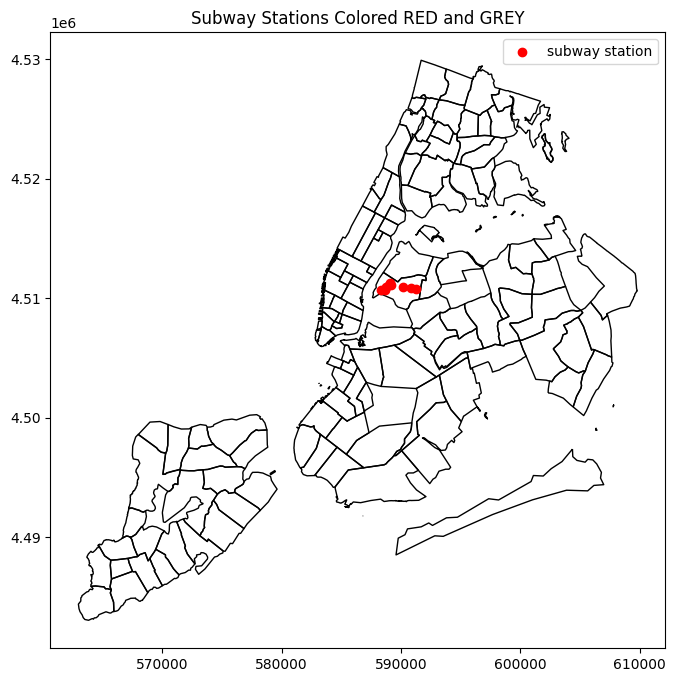

In [48]:
query = """
SELECT nbh.name, subway.name, subway.geom
FROM ch05.neighborhoods AS nbh, ch05.subway_stations AS subway
WHERE nbh.name = 'Sunny Side' AND ST_Within(subway.geom, nbh.geom);
"""
subway_stations = gpd.read_postgis(query, engine, geom_col='geom')
print(subway_stations)

query02 = """
SELECT * FROM ch05.neighborhoods
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
subway_stations.plot(ax=ax, color='red', label='subway station')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## 6. ST_Distance / ST_DWithin
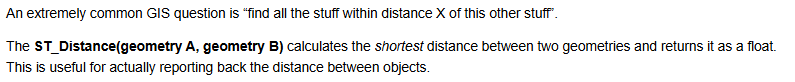
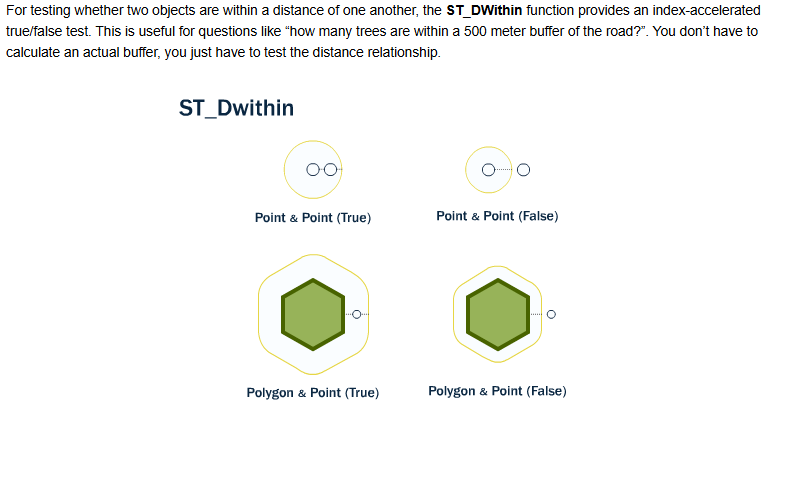

## Task 6
Find the street that are within 50m of the subway station its `alt_name` is `Yankee Stadium`, and calculate their distance

         name      name  st_distance  \
0   River Ave  161st St     0.356185   
1  E 161st St  161st St    18.104581   

                                                geom  
0  MULTILINESTRING ((590189.688 4518806.333, 5901...  
1  MULTILINESTRING ((590228.547 4520431.887, 5903...  


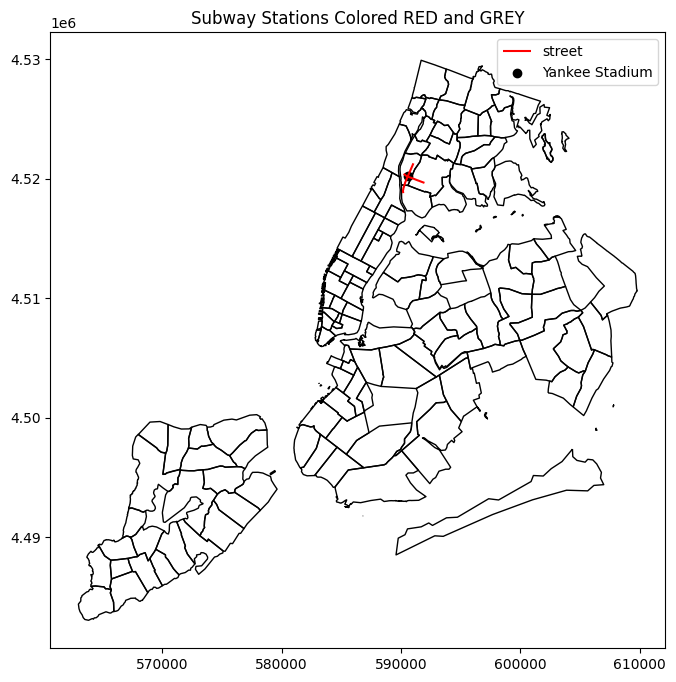

In [63]:
query = """
SELECT streets.name, subway.name, ST_Distance(streets.geom, subway.geom), streets.geom
FROM ch05.streets AS streets, ch05.subway_stations AS subway
WHERE subway.alt_name = 'Yankee Stadium' AND ST_Dwithin(streets.geom, subway.geom, 50);
"""
subway_stations = gpd.read_postgis(query, engine, geom_col='geom')
print(subway_stations)

query02 = """
SELECT * FROM ch05.neighborhoods
"""

query03 = """
SELECT * FROM ch05.subway_stations AS subway WHERE subway.alt_name = 'Yankee Stadium';
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')

yankee = gpd.read_postgis(query03, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
subway_stations.plot(ax=ax, color='red', label='street')
yankee.plot(ax=ax, color='black', label='Yankee Stadium')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## Task 1

Select subway stations with the colors RED and GREY, then plot them in two different colors on the map.

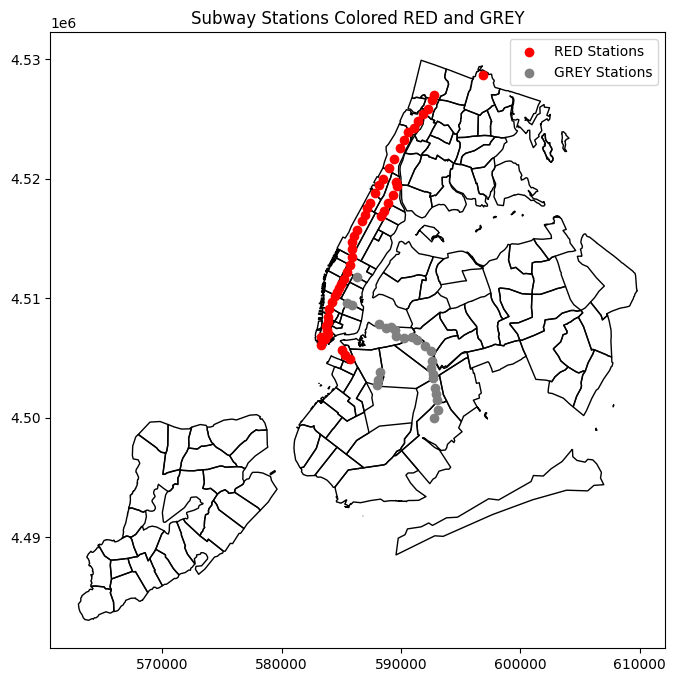

In [7]:
query = """
SELECT name, color, geom
FROM ch05.subway_stations
WHERE color IN ('RED', 'GREY');
"""

subway_stations = gpd.read_postgis(query, engine, geom_col='geom')

query02 = """
SELECT * FROM ch05.neighborhoods
"""

all_neighborhood = gpd.read_postgis(query02, engine, geom_col='geom')
# Plotting with different colors for RED and GREY stations
fig, ax = plt.subplots(figsize=(10, 8))
all_neighborhood.plot(ax=ax, color = 'none')
subway_stations[subway_stations['color'] == 'RED'].plot(ax=ax, color='red', label='RED Stations')
subway_stations[subway_stations['color'] == 'GREY'].plot(ax=ax, color='grey', label='GREY Stations')

plt.legend()
plt.title('Subway Stations Colored RED and GREY')
plt.show()

## Task 2: ST_Crosses

Using [ST_Crosses](https://postgis.net/docs/ST_Crosses.html) to identify the streets that **cross** with the 100 m buffer around each station.

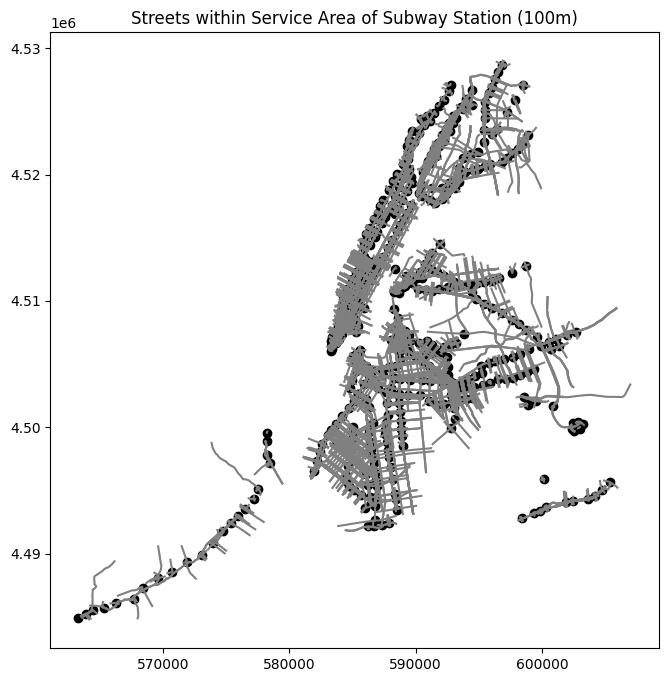

In [7]:
query = """
SELECT subway.name, street.geom
FROM ch05.subway subway, ch05.streets street
WHERE ST_Crosses(ST_Buffer(subway.geom, 100), street.geom);
"""

all_subway_query = """ SELECT * FROM ch05.subway
"""
overlapping_service_areas = gpd.read_postgis(query, engine, geom_col='geom')
all_subway = gpd.read_postgis(all_subway_query, engine, geom_col='geom')
# Plotting service areas with no fill color to highlight overlaps
fig, ax = plt.subplots(figsize=(10, 8))

all_subway.plot(ax = ax, color = 'black')
overlapping_service_areas.plot(ax=ax, facecolor='none', edgecolor='grey')

plt.title('Streets within Service Area of Subway Station (100m)')
plt.show()

## Task 3: ST_Centroid

Calculate the centroid of each neighborhood polygon using [ST_Centroid](https://postgis.net/docs/ST_Centroid.html) and visualize them on the map.

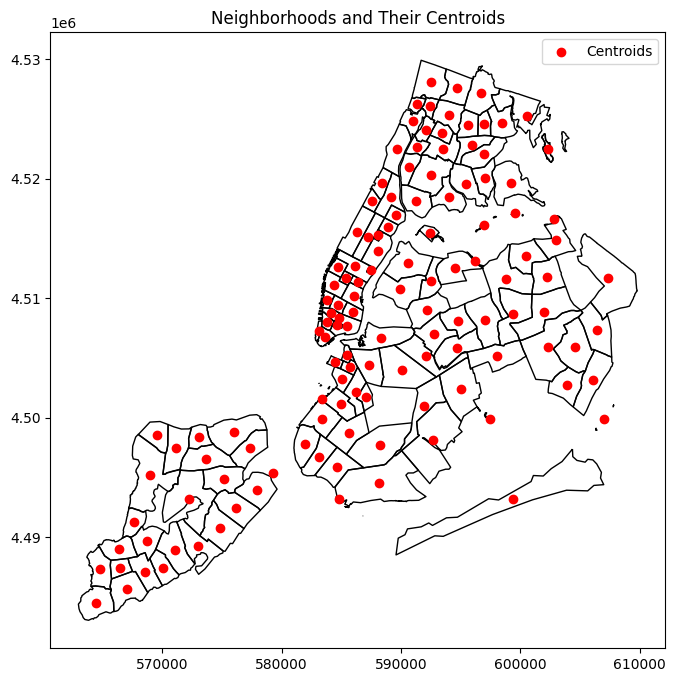

In [11]:
query = """
SELECT name, ST_Centroid(geom) AS geom
FROM ch05.neighborhoods;
"""

neighborhood_centroids = gpd.read_postgis(query, engine, geom_col='geom')

# Plot neighborhoods and their centroids
neighborhoods = gpd.read_postgis("SELECT * FROM ch05.neighborhoods", engine, geom_col='geom')

fig, ax = plt.subplots(figsize=(10, 8))
neighborhoods.plot(ax=ax, edgecolor='black', facecolor='none')
neighborhood_centroids.plot(ax=ax, color='red', marker='o', label='Centroids')

plt.legend()
plt.title('Neighborhoods and Their Centroids')
plt.show()

## Task 4. Nearest subway station to each centroid

Use these centroids to find the subway station closest to each neighborhood center.

[ST_Centroid](https://postgis.net/docs/ST_Centroid.html)

[ST_Distance](https://postgis.net/docs/ST_Distance.html)

MIN(ST_Distance()): The subquery is looking for the minimum distance between the neighborhood's centroid and all subway stations. 

<Axes: >

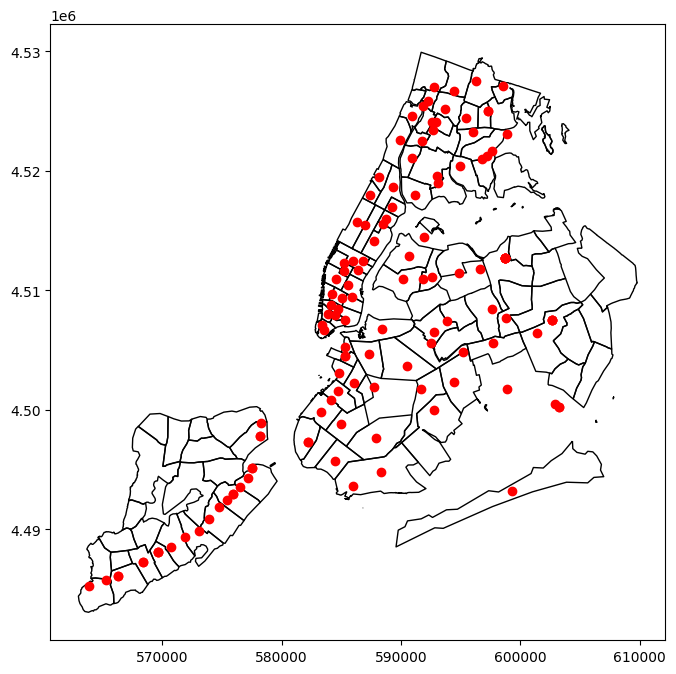

In [19]:
query = """SELECT nbh.name AS neighborhood, subway.name AS nearest_station, subway.geom
FROM ch05.neighborhoods AS nbh, ch05.subway AS subway
WHERE ST_Distance(ST_Centroid(nbh.geom), subway.geom) = (
    SELECT MIN(ST_Distance(ST_Centroid(nbh.geom), s.geom))
    FROM ch05.subway AS s
);"""

neighborhoods = gpd.read_postgis("SELECT * FROM ch05.neighborhoods", engine, geom_col='geom')
nearest_subway = gpd.read_postgis(query, engine)


fig, ax = plt.subplots(figsize=(10, 8))
neighborhoods.plot(ax=ax, edgecolor='black', facecolor='none')
nearest_subway.plot(ax=ax, color='red', marker='o', label='Centroids')
